<a href="https://colab.research.google.com/github/AliAkbarBadri/learn-complex-network/blob/master/hello-world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# ! pip install -q networkx
# ! pip install -q python-louvain

In [37]:
import networkx as nx

# undirected graph

In [ ]:
G = nx.Graph()
G.add_edge('C','E', relation ='friend')
G.add_edge('C','F', relation ='family')

In [ ]:
G.edges()

EdgeView([('C', 'E'), ('C', 'F')])

# weighted graph

In [ ]:
G.add_edge('A','B', weight=6)

# signed graph

In [ ]:
G.add_edge('B','C', sign ='+')
G.add_edge('C','D', sign ='-')

# directed graph

In [ ]:
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('B','A')

# multi graph

In [11]:
G = nx.MultiGraph()
G.add_edge('A','B', weight=16, relation ='friend')
G.add_edge('A','D', weight=16, relation ='neighbour')
G.add_edge('B','C', weight=5, relation ='family')
G.add_edge('C','A', weight=5, relation ='friend')
G.add_node('A', role='trader')
G.add_node('B', role='trader')
G.add_node('C', role='manager')

In [ ]:
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'D'), ('B', 'C')])

In [ ]:
G.nodes(data=True)

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'trader'}, 'D': {}, 'C': {'role': 'manager'}})

In [ ]:
G.nodes['A']['role']

'trader'

In [ ]:
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'D'), ('B', 'C')])

In [ ]:
G.edges(data=True)

MultiEdgeDataView([('A', 'B', {'weight': 16, 'relation': 'friend'}), ('A', 'D', {'weight': 16, 'relation': 'neighbour'}), ('B', 'C', {'weight': 5, 'relation': 'family'})])

In [ ]:
G.edges(data='relation')

MultiEdgeDataView([('A', 'B', 'friend'), ('A', 'D', 'neighbour'), ('B', 'C', 'family')])

In [ ]:
G.edges(['D','C'], data=True)

MultiEdgeDataView([('D', 'A', {'weight': 16, 'relation': 'neighbour'}), ('C', 'B', {'weight': 5, 'relation': 'family'})])

# Directed mutli graph

In [ ]:
G = nx.MultiDiGraph()



# Bipartite Graph

In [38]:
from networkx.algorithms import bipartite

In [39]:
B = nx.Graph()

B.add_nodes_from(['A','B','C','D', 'E'], bipartite=0)
B.add_nodes_from([1,2,3,4], bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

In [28]:
bipartite.is_bipartite(B), bipartite.is_bipartite(G) 

(True, False)

In [40]:
B.add_edge('A','B')

In [41]:
bipartite.is_bipartite(B)

False

In [42]:
B.remove_edge('A','B')

In [43]:
bipartite.is_bipartite_node_set(B, [1,2,3,4])

True

In [44]:
bipartite.is_bipartite_node_set(B, ['A','B','C','D','E'])

True

In [45]:
bipartite.is_bipartite_node_set(B, ['A','B','C','D','E',1])

False

In [46]:
B.add_edge('D',4)

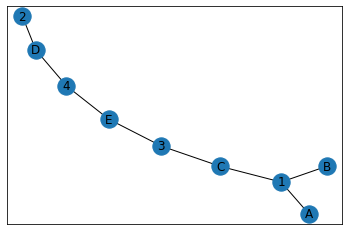

In [53]:
nx.draw_networkx(B)

In [47]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

## projected graph

In [48]:
P = bipartite.projected_graph(B, [1,2,3,4])

In [49]:
P.edges

EdgeView([(1, 3), (2, 4), (3, 4)])

In [50]:
PW = bipartite.weighted_projected_graph(B, [1,2,3,4])

In [52]:
PW.edges(data=True)

EdgeDataView([(1, 3, {'weight': 1}), (2, 4, {'weight': 1}), (3, 4, {'weight': 1})])